+ Name: Lê Hoàng Anh Đức
+ ID: 11219268
+ Class: DSEB 63

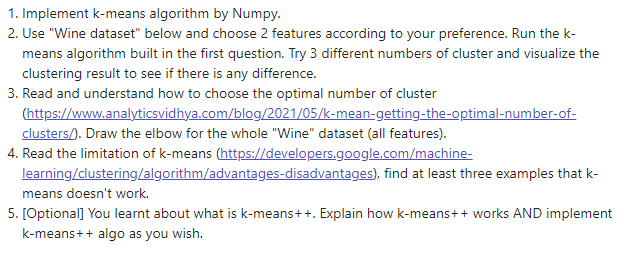

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

# Ex1

In [2]:
def kmeans(X, k, max_iters=300):
    """K-means clustering algorithm."""

    n_samples = X.shape[0]

    # Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    # Iterations
    for _ in range(max_iters):
        # Assign samples to closest centroids
        assignments = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)

        # Update centroids
        old_centroids = centroids
        for i in range(k):
            centroids[i] = np.mean(X[assignments == i], axis=0)

        # Check for convergence
        if np.all(old_centroids == centroids):
            break

    return centroids, assignments


# Ex2

In [3]:
data = pd.read_csv("wine-clustering.csv")

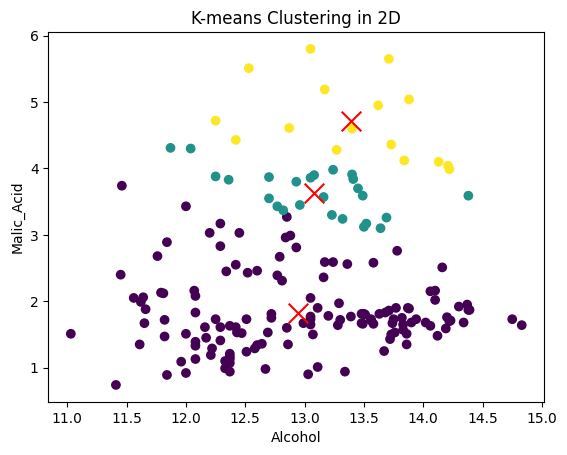

In [4]:
# Preparing input 
X = data.iloc[:, :2]  # Assuming features are in the first columns
k = 3  # Number of clusters
centroids, assignments = kmeans(X.values, k)

# Plotting clusters (for 2D data)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=assignments)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-means Clustering in 2D')
plt.show()

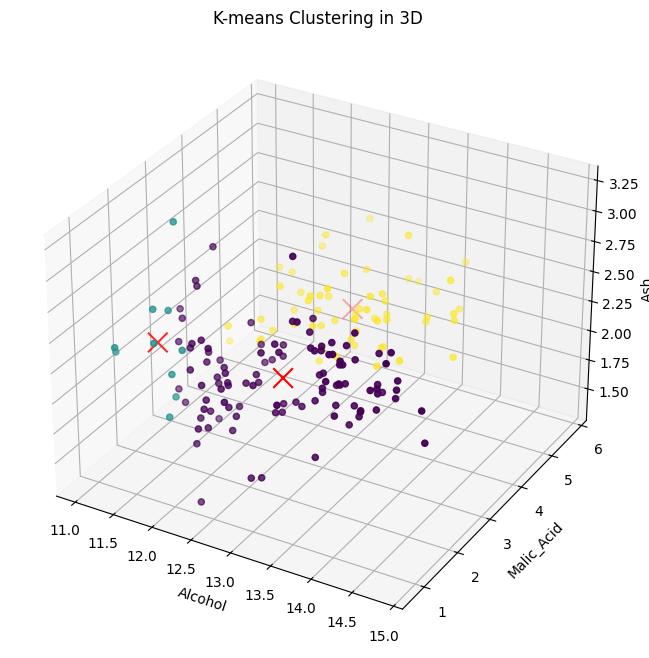

In [5]:
# Preparing input
X = data.iloc[:, :3] 
k = 3  # Number of clusters
centroids, assignments = kmeans(X.values, k)


# Plotting clusters (for 3D data)
fig = plt.figure(figsize=(8, 8,))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=assignments, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2],rotation = 90)
ax.set_title('K-means Clustering in 3D')
plt.show()


# Ex3

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


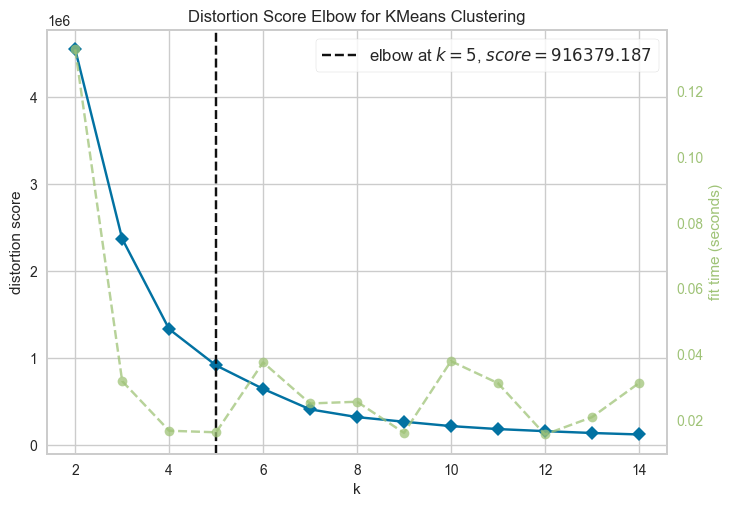

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=14)
Elbow_M.fit(data)
Elbow_M.show()

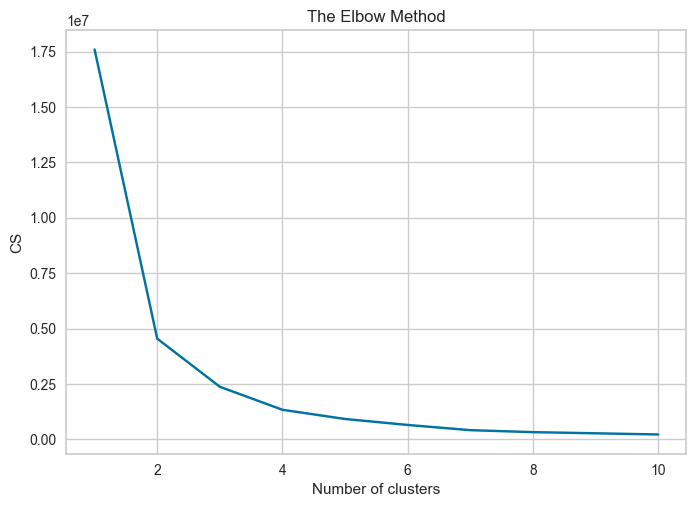

In [8]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# Ex4

In [9]:
def kmeans(X, k, max_iters=300):
    """K-means clustering algorithm."""

    n_samples = X.shape[0]

    # Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    # Iterations
    for _ in range(max_iters):
        # Assign samples to closest centroids
        assignments = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)

        # Update centroids
        old_centroids = centroids
        for i in range(k):
            centroids[i] = np.mean(X[assignments == i], axis=0)

        # Check for convergence
        if np.all(old_centroids == centroids):
            break

    return centroids, assignments

In [10]:
# prepare input
np.random.seed(11)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = pd.DataFrame(np.concatenate((X0, X1, X2), axis = 0))

def test_kmeans(X, n_cluster):
    centroids, assignments = kmeans(X.values, n_cluster)
    # Plotting clusters (for 2D data)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=assignments, cmap='Set2')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('K-means Clustering in 2D')
    plt.show()

Bad initial

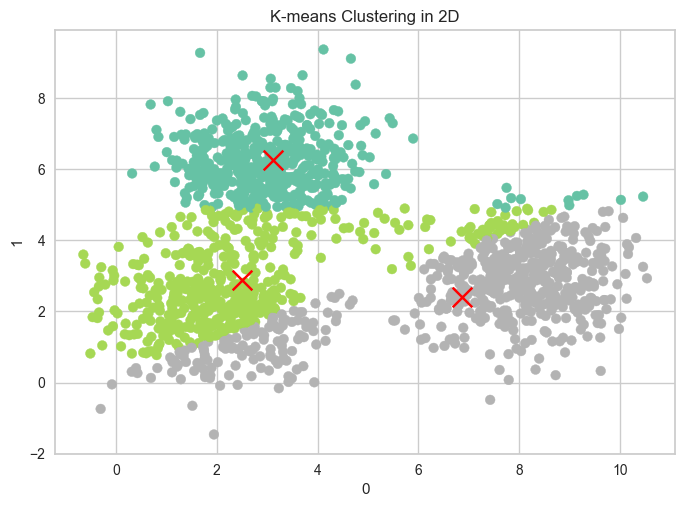

In [11]:
test_kmeans(X,3)

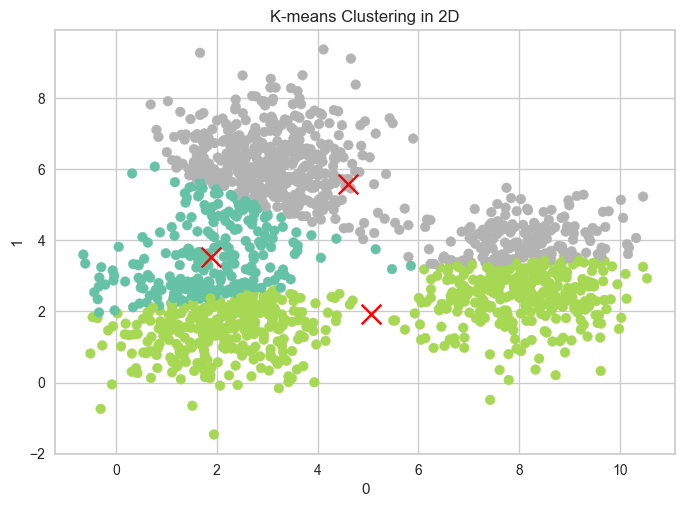

In [12]:
test_kmeans(X,3)

K too large

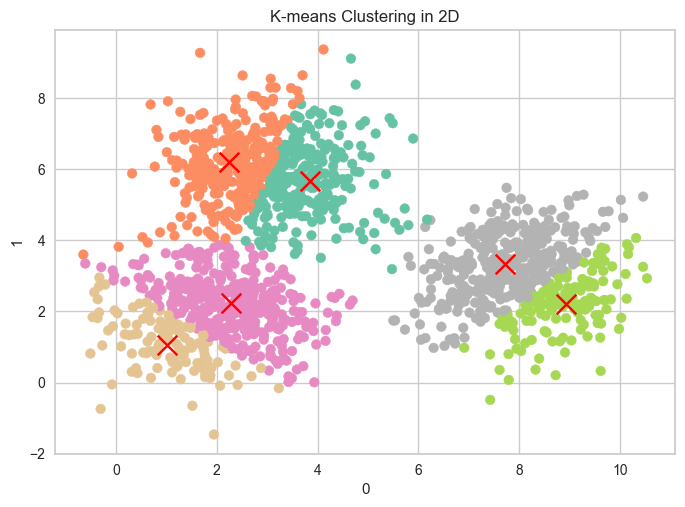

In [13]:
test_kmeans(X,6)

K too small

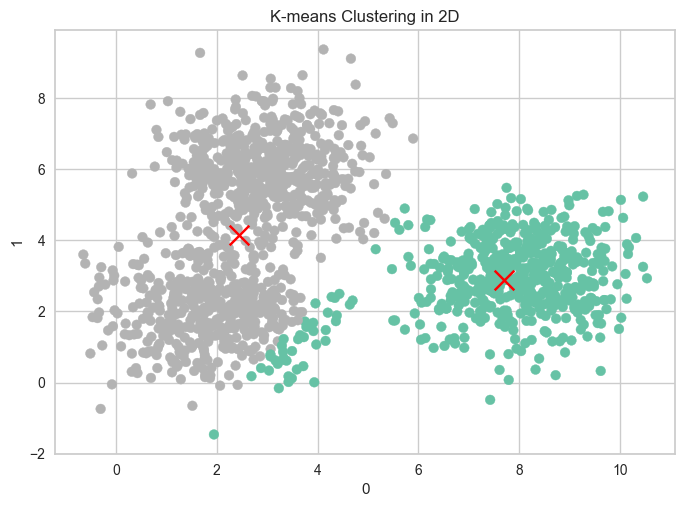

In [14]:
test_kmeans(X,2)